# House prediction !

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Housing.csv")

In [3]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# Data analysis

<Axes: xlabel='bedrooms', ylabel='price'>

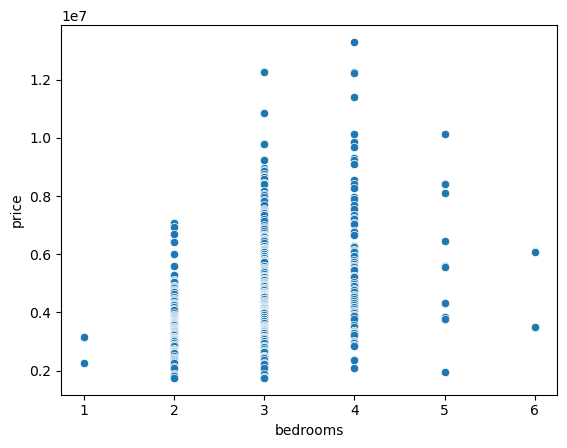

In [5]:
sns.scatterplot(x = data["bedrooms"] , y = data["price"] , data=data)

# Houses having 4 bedrooms have highest price !

<Axes: xlabel='bathrooms', ylabel='price'>

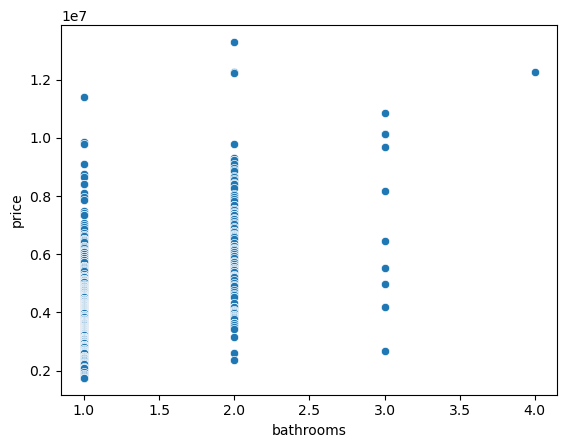

In [6]:
sns.scatterplot(x=data["bathrooms"] , y=data["price"] , data=data)

# Houses having 2 bedrooms have highest price

<Axes: xlabel='mainroad', ylabel='price'>

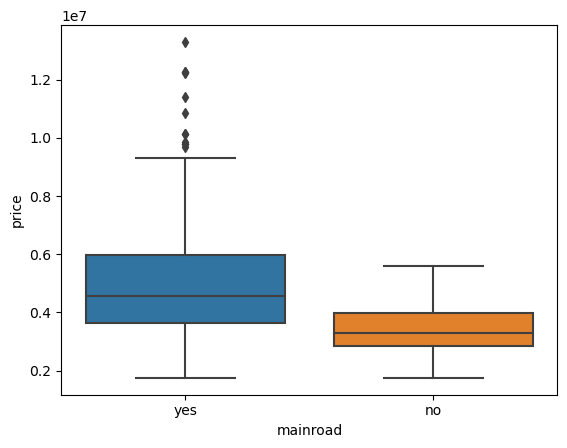

In [7]:
sns.boxplot(x =data["mainroad"] , y = data["price"] , data=data)

# Houses on mainroad have higher prices 

<Axes: xlabel='guestroom', ylabel='price'>

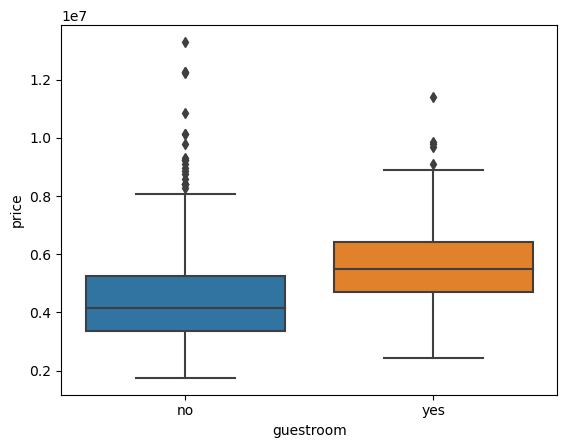

In [8]:
sns.boxplot(x =data["guestroom"] , y = data["price"] , data=data)

# Houses without guestroom have great prices 

<Axes: xlabel='hotwaterheating', ylabel='price'>

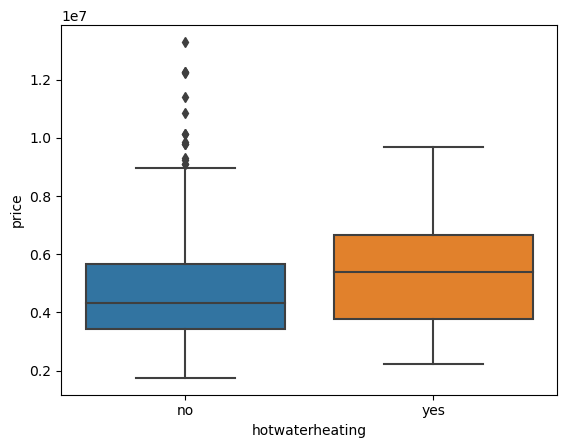

In [9]:
sns.boxplot(x =data["hotwaterheating"] , y = data["price"] , data=data)

# Houses without hotwaterheating have higher price

<Axes: xlabel='airconditioning', ylabel='price'>

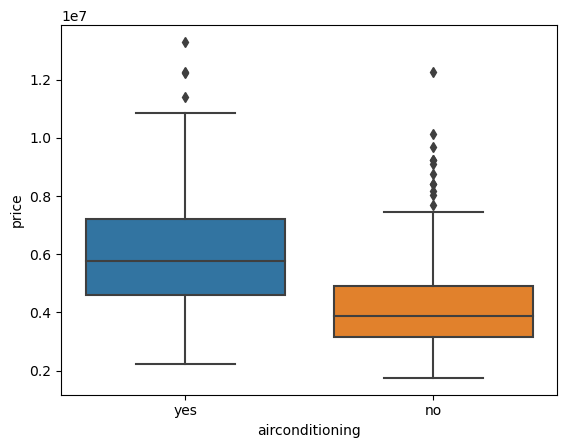

In [10]:
sns.boxplot(x =data["airconditioning"] , y = data["price"] , data=data)

# Houses having airconditioning have higher prices 

<Axes: xlabel='parking', ylabel='price'>

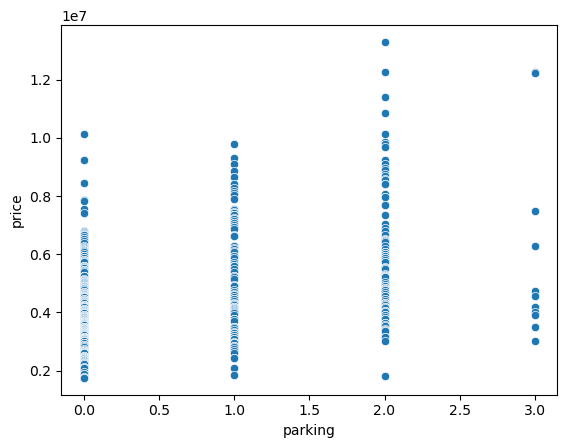

In [11]:
sns.scatterplot(x = data["parking"] , y = data["price"] , data=data)

# House with the parking for 2 vehicles have highest price 

# Data preprocessing

In [12]:
objlist = []
for i in data:
    if(data[i].dtype == "object"):
        objlist.append(i)

In [13]:
from sklearn.preprocessing import LabelEncoder , StandardScaler

In [14]:
le = LabelEncoder()

In [15]:
SS = StandardScaler()

In [16]:
for i in objlist:
    data[i] = le.fit_transform(data[i])

In [17]:
data.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,-0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,-0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.150477


In [18]:
data.drop(["furnishingstatus" , "hotwaterheating" ,"mainroad" , "guestroom"] , axis = 1 , inplace = True)

# Train test

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x = data.drop("price" , axis = 1)

In [21]:
y = data["price"]

In [22]:
new_x = SS.fit_transform(x)

In [23]:
x_train , x_test , y_train , y_test = train_test_split(x , y ,test_size = 0.25 , random_state = 35)

In [24]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((408, 8), (137, 8), (408,), (137,))

# Model implimentation

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr = LinearRegression()

In [27]:
lr.fit(x_train , y_train)

LinearRegression()

In [28]:
y_pred = lr.predict(x_test)

In [29]:
from sklearn import metrics 

In [30]:
from sklearn.metrics import r2_score

In [31]:
print("Mae:" , metrics.mean_absolute_error(y_pred , y_test))
print("Mse:" , metrics.mean_squared_error(y_pred , y_test))
print("Rmse:" , np.sqrt(metrics.mean_squared_error(y_pred , y_test)))

Mae: 748267.5666358103
Mse: 898203203810.5696
Rmse: 947735.830181897


In [32]:
print("R2_score :" , r2_score(y_pred , y_test))

R2_score : 0.5870788983010891


# DecisionTreeRegressor

In [33]:
from sklearn.tree import DecisionTreeRegressor

In [34]:
dt = DecisionTreeRegressor()

In [35]:
dt.fit(x_train , y_train)

DecisionTreeRegressor()

In [36]:
y2_pred = dt.predict(x_test)

In [37]:
print("Mae:" , metrics.mean_absolute_error(y2_pred , y_test))
print("Mse:" , metrics.mean_squared_error(y2_pred , y_test))
print("Rmse:" , np.sqrt(metrics.mean_squared_error(y2_pred , y_test)))

Mae: 1057292.0924574211
Mse: 2292708759004.461
Rmse: 1514169.3297001035


In [38]:
print("R2_score :" , r2_score(y2_pred , y_test))

R2_score : 0.339133111374995


# RandomForestRegressor

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
rm = RandomForestRegressor()

In [41]:
rm.fit(x_train , y_train)

RandomForestRegressor()

In [42]:
y3_pred = dt.predict(x_test)

In [43]:
print("Mae:" , metrics.mean_absolute_error(y3_pred , y_test))
print("Mse:" , metrics.mean_squared_error(y3_pred , y_test))
print("Rmse:" , np.sqrt(metrics.mean_squared_error(y3_pred , y_test)))

Mae: 1057292.0924574211
Mse: 2292708759004.461
Rmse: 1514169.3297001035


In [44]:
print("R2_score :" , r2_score(y3_pred , y_test))

R2_score : 0.339133111374995
